In [1]:
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from scipy import interpolate
import pandas as pd
import sympy as syp
from astropy import units as u
import radio_beam
from astropy.table import Table
from radio_beam import Beam
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
from dendrocat.aperture import Ellipse
from regions import Regions, PixCoord
from astropy import stats
from itertools import chain
from radio_beam import Beams
from astropy.convolution import convolve
W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'

w51n_b6_conv = w51conv + 'w51n_new_nocorr_in_area_B6_conv.fits'
#w51n_b3_conv = w51conv + 'w51n_B3_conv.fits'
#w51e_b3_conv = w51conv + 'w51e_B3_conv.fits'
w51e_b6_conv = w51conv + 'w51e_new_nocorr_in_area_B6_conv.fits'


w51e_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51e_matched.fits'
w51n_matched_catalog = '/home/t.yoo/w51/catalogue/dendrogram/dendro_w51n_matched.fits'

w51e_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b3_std_sky.reg'
w51e_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51e_b6_std_sky.reg'
w51n_b3_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b3_std_sky.reg'
w51n_b6_noiseregion = '/orange/adamginsburg/w51/TaehwaYoo/w51n_b6_std_sky.reg'
w51e_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'





### all sources

[]
[]
[]
[]
[6.94023338e-05 1.42732902e-05 6.94023338e-05 3.47535461e-05
 2.87067058e-04 1.07895932e-05 3.83372331e-05 9.84583636e-04
 7.35752164e-05 3.12246428e-05 2.53038390e-05 3.00369563e-05
 1.20631319e-05 3.30362474e-05 2.67028809e-05 2.92838584e-04
 2.67028809e-05 1.57838141e-04 1.28685973e-04 4.41583134e-05
 4.51361067e-05 1.78150855e-04 3.21432105e-05 3.21432105e-05
 7.22781957e-05 1.78150855e-04 1.47002021e-04 6.10351562e-05
 1.94512158e-05 6.10351562e-05 7.18744037e-05 3.43322754e-05
 3.43322754e-05 3.67876082e-05 1.07625854e-04 6.39425650e-04
 4.43227769e-05 5.83536474e-05 2.44110821e-04 2.38898747e-04
 2.03827667e-04 1.19601558e-04 2.98205892e-04 1.49942352e-04
 2.24549296e-04 9.89618055e-05 1.09966547e-04 9.89618055e-05
 3.65892908e-05 2.68360631e-04 2.01854806e-05 2.01854806e-05
 6.59622821e-05 7.27797853e-05 1.94512158e-05 3.90890151e-05
 1.94512158e-05 7.27797853e-05 8.83166268e-05 3.90890151e-05
 2.25680534e-05 2.25680534e-05 1.02359069e-04 1.36904590e-04
 3.93598386e

Text(0, 0.5, 'YSO number')

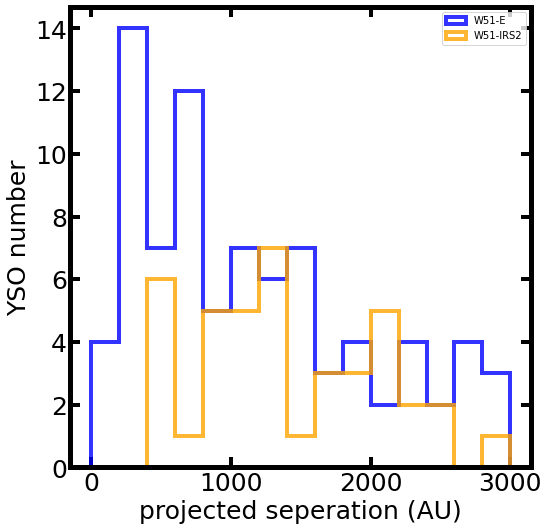

In [5]:
from sklearn.neighbors import NearestNeighbors
import matplotlib as mpl
plt.rcParams['axes.labelsize']=25
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.titlesize']=25
mpl.rcParams['axes.linewidth'] = 5
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2
params = {"xtick.top": True, "ytick.right": True, "xtick.direction": "in", "ytick.direction": "in"}
plt.rcParams.update(params)
w51ecat = Table.read(w51e_matched_catalog)
w51ncat = Table.read(w51n_matched_catalog)

w51e_xsky = [w51ecat['b6_xsky'][i] if w51ecat['b6_xsky'][i]>0 else w51ecat['b3_xsky'][i] for i in range(len(w51ecat['b6_xsky']))]
w51e_ysky = [w51ecat['b6_ysky'][i] if w51ecat['b6_ysky'][i]>0 else w51ecat['b3_ysky'][i] for i in range(len(w51ecat['b6_ysky']))]
w51n_xsky = [w51ncat['b6_xsky'][i] if w51ncat['b6_xsky'][i]>0 else w51ncat['b3_xsky'][i] for i in range(len(w51ncat['b6_xsky']))]
w51n_ysky = [w51ncat['b6_ysky'][i] if w51ncat['b6_ysky'][i]>0 else w51ncat['b3_ysky'][i] for i in range(len(w51ncat['b6_ysky']))]

w51e_xysky = np.vstack((w51e_xsky, w51e_ysky)).T
w51n_xysky = np.vstack((w51n_xsky, w51n_ysky)).T

nbrs_w51e = NearestNeighbors(n_neighbors=2, algorithm='brute', radius=200).fit(w51e_xysky)
distances_w51e, indices = nbrs_w51e.kneighbors(w51e_xysky)

zeroind = np.where(distances_w51e[:,1]==0)[0]
print(w51e_xysky[zeroind,0])
print(w51e_xysky[zeroind,1])
print(w51e_xysky[zeroind,0])
print(w51e_xysky[zeroind,1])
print(distances_w51e[:,1])
print(indices[zeroind])
nbrs_w51n = NearestNeighbors(n_neighbors=2, algorithm='brute',radius=200).fit(w51n_xysky)
distances_w51n, indices = nbrs_w51n.kneighbors(w51n_xysky)

dist_w51e = distances_w51e[:,1] * np.pi/180 * 5.41*1000*206265
dist_w51n = distances_w51n[:,1] * np.pi/180 * 5.1*1000*206265
print(np.min(dist_w51e),np.min(dist_w51n))

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.15,0.15,0.8,0.8])

bins = np.linspace(0,3000,16)
ax1.hist(dist_w51e, bins=bins, alpha=0.8, edgecolor='b', histtype='step', label='W51-E', lw=4)
ax1.hist(dist_w51n, bins=bins, alpha=0.8, edgecolor='orange', histtype='step', label='W51-IRS2', lw=4)
ax1.legend()
ax1.set_xlabel('projected seperation (AU)')
ax1.set_ylabel('YSO number')
         
         

### sources inside cores

highresindarr [41, 40, 134, 29, 30, 31, 32, 33, 34, 46, 48, 50, 51, 54, 56, 52, 55, 58, 59, 60, 61, 8, 9, 10, 85, 120, 37, 102, 1, 2, 3, 83, 53, 57, 45, 47, 19, 20, 22, 23, 24, 90, 70, 71, 82, 123, 119, 65, 117, 118, 35, 129, 132]
[  1   2   3   8   9  10  19  20  22  23  24  29  30  31  32  33  34  35
  37  40  41  45  46  47  48  50  51  52  53  54  55  56  57  58  59  60
  61  65  70  71  82  83  85  90 102 117 118 119 120 123 129 132 134]
YSOs associated with cores 53  out of  137
highresindarr [10, 11, 13, 24, 9, 61, 44, 45, 3, 6, 7, 23, 29, 19, 20, 30, 31, 4, 8, 14, 66, 42, 48, 49, 65, 33, 34, 36, 37, 38, 67, 25, 0, 41, 35, 57, 60, 5, 28, 50, 68, 39, 32, 40, 70, 71, 72, 46, 27, 21, 64, 59, 1, 69, 63, 22, 52]
[ 0  1  3  4  5  6  7  8  9 10 11 13 14 19 20 21 22 23 24 25 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 48 49 50 52 57 59 60 61 63
 64 65 66 67 68 69 70 71 72]
YSOs associated with cores 57  out of  74
148.590227467325 426.0239599662054


Text(0, 0.5, 'YSO number')

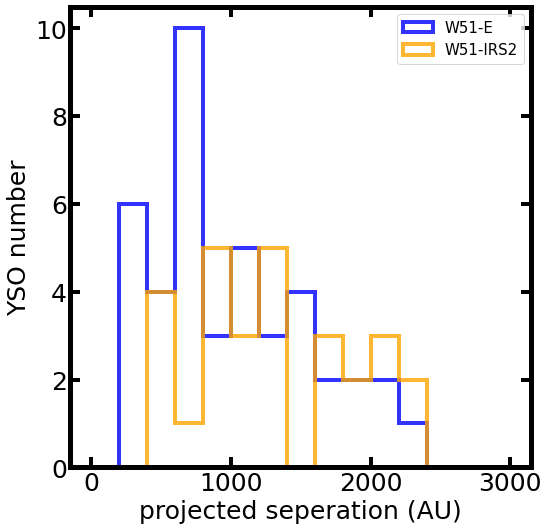

In [7]:
from astropy.io import ascii

catalogdir = '/orange/adamginsburg/ALMA_IMF/catalogs/getsf-smoothed/'
cat_w51e = catalogdir + 'W51-E-getsf.cat'
cat_w51n = catalogdir + 'W51-IRS2-getsf.cat'


w51n_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'
w51e_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51e2.spw0thru19.14500.robust0.thr0.15mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b6_calibrated_pbcor = '/orange/adamginsburg/w51/TaehwaYoo/w51n.spw0thru19.14500.robust0.thr0.1mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
#---------- local direc  ------------

"""

w51n_b3_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'



w51e_b3_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/Users/dbahck37/w51data/alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'


w51n_b6_conv_briggs = '/Users/dbahck37/w51data/convolved_new/w51n_briggs_B6_conv.fits'
w51n_b3_tt0 = '/Users/dbahck37/w51data/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_b3_tt0 = '/Users/dbahck37/W51data/w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

w51e_b6_conv_briggs ='/Users/dbahck37/W51data/convolved_new/w51e_briggs_B6_conv.fits'
"""




class catdata():
    def __init__(self,catfile,band='B3'):
        catdata_w51e = ascii.read(catfile,data_start=0,format='commented_header', header_start=120,  comment="!")
        self.sky_ra = catdata_w51e['WCS_ACOOR']
        self.sky_dec = catdata_w51e['WCS_DCOOR']
        self.pix_x = catdata_w51e['XCO_P']
        self.pix_y = catdata_w51e['YCO_P']
        
        if band=='B3':
            bandind = 3
        else:
            bandind = 2

        self.afwhm = catdata_w51e['AFWHM0%d'%bandind]
        self.bfwhm = catdata_w51e['BFWHM0%d'%bandind]

        self.asize = catdata_w51e['ASIZE0%d'%bandind]
        self.bsize = catdata_w51e['BSIZE0%d'%bandind]

        self.theta = catdata_w51e['THETA0%d'%bandind]
        
        self.flux = catdata_w51e['FXT_BST0%d'%bandind]
        self.fluxerr = catdata_w51e['FXT_ERR0%d'%bandind]
        self.flux_g = catdata_w51e['FXT_ALT0%d'%bandind]
        self.fooa = catdata_w51e['FOOA0%d'%bandind]
        self.foob = catdata_w51e['FOOB0%d'%bandind]
        

        self.no = catdata_w51e['NO']

        self.rec_ind_b3 = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15))[0]

        self.rec_ind_b6 = np.where((np.abs(catdata_w51e['GOODM02'])>1)&
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
        self.rec_ind = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15) &
                           (np.abs(catdata_w51e['GOODM02'])>1) &
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
        
from functools import reduce
from itertools import chain

def count_points_in_ellipse(xcen,ycen,major,minor,pa,xpos,ypos):
    # caclulate foci positions 
    # must be full major, minor not semi major, minor
    fodx = np.cos(pa)*np.sqrt((major/2)**2-(minor/2)**2)
    fody = np.sin(pa)*np.sqrt((major/2)**2-(minor/2)**2)
    
    fox1 = xcen + fodx
    foy1 = ycen + fody
    
    fox2 = xcen - fodx
    foy2 = ycen - fody
    
    dist1 = np.sqrt((xpos-fox1)**2+(ypos-foy1)**2)
    dist2 = np.sqrt((xpos-fox2)**2+(ypos-foy2)**2)
    
    isinside = np.where(dist1+dist2<major)[0]
    
    return len(isinside), list(isinside)


def multiplicity(hdrhr,core_catdatadir,xysource,isb3=True,beam=None,use_criteria='single',issky=True, label=None,
                 aperture='fwhm+beam',limitarea=None,  maxrad=1e3):
    
    catdata = ascii.read(core_catdatadir,data_start=0,format='commented_header', header_start=120,  comment="!")
    sky_ra = catdata['WCS_ACOOR']
    sky_dec = catdata['WCS_DCOOR']
    no = catdata['NO']
    if isb3:
        bandlabel = '03'
    else:
        bandlabel = '02'
    fooa = catdata['FOOA%s'%bandlabel]
    foob = catdata['FOOB%s'%bandlabel]
    theta = catdata['THETA%s'%bandlabel]
    afwhm = catdata['AFWHM%s'%bandlabel]
    bfwhm = catdata['BFWHM%s'%bandlabel]
    
    ncat = len(no)
   
    if use_criteria == 'single':
        rec_ind = np.where((np.abs(catdata['GOODM%s'%bandlabel])>1)&
                   (np.abs(catdata['SIGNM%s'%bandlabel])>1)&
                   (catdata['FXP_BST%s'%bandlabel]/catdata['FXP_ERR%s'%bandlabel]>2)&
                   (catdata['FXT_BST%s'%bandlabel]/catdata['FXT_ERR%s'%bandlabel]>2)&
                   (catdata['AFWHM%s'%bandlabel]/catdata['BFWHM%s'%bandlabel]<2)&
                   (catdata['FOOA%s'%bandlabel]/catdata['AFWHM%s'%bandlabel]>1.15))[0]
    elif use_criteria == 'both': 
        rec_ind = np.where((np.abs(catdata_w51e['GOODM03'])>1)&
                           (np.abs(catdata_w51e['SIGNM03'])>1)&
                           (catdata_w51e['FXP_BST03']/catdata_w51e['FXP_ERR03']>2)&
                           (catdata_w51e['FXT_BST03']/catdata_w51e['FXT_ERR03']>2)&
                           (catdata_w51e['AFWHM03']/catdata_w51e['BFWHM03']<2)&
                           (catdata_w51e['FOOA03']/catdata_w51e['AFWHM03']>1.15) &
                           (np.abs(catdata_w51e['GOODM02'])>1) &
                           (np.abs(catdata_w51e['SIGNM02'])>1)&
                           (catdata_w51e['FXP_BST02']/catdata_w51e['FXP_ERR02']>2)&
                           (catdata_w51e['FXT_BST02']/catdata_w51e['FXT_ERR02']>2)&
                           (catdata_w51e['AFWHM02']/catdata_w51e['BFWHM02']<2)&
                           (catdata_w51e['FOOA02']/catdata_w51e['AFWHM02']>1.15))[0]
        
    else:
        rec_ind = np.arange(ncat)
        
    if limitarea is not None:
        posind = np.where((sky_ra>limitarea[0])&(sky_ra<limitarea[1])&
                          (sky_dec>limitarea[2])&(sky_dec<limitarea[3]))[0]
    else:
        posind = np.arange(ncat)
    if label is None:
        label=np.arange(ncat)
        
    totalind = reduce(np.intersect1d, (rec_ind,  posind, label))  
        
    sky_ra = sky_ra[totalind]
    sky_dec = sky_dec[totalind]
    fooa = fooa[totalind]
    foob = foob[totalind]
    theta = theta[totalind]
    no = no[totalind]
    afwhm =afwhm[totalind]
    bfwhm = bfwhm[totalind]
    
    skypos = np.vstack((sky_ra,sky_dec)).T

    
    wcsNB = WCS(hdrhr,naxis=2)
    scaleNB = wcsNB.proj_plane_pixel_scales()[0]
    beamNB = Beam.from_fits_header(hdrhr)

    xypos_core = wcsNB.wcs_world2pix(skypos,0)
    xpos_core = xypos_core[:,0]
    ypos_core = xypos_core[:,1]
    
    if issky:
        xysource_pix = wcsNB.wcs_world2pix(xysource,0)
    else:
        xysource_pix = xysource
    numarr=[] ; indarr=[]; indarr2=[] ; highresindarr = [] ; totalindarr=[]
    highresindarr2=[]

    #print(xysource)
    for i in range(len(xypos_core)):
        if aperture is 'footprint':
            major = fooa[i]/3600/scaleNB.value
            minor = foob[i]/3600/scaleNB.value
            pa = theta[i]+90
        elif aperture is 'fwhm+beam':
            meanbeamsize = (beam.major.value+beam.minor.value)/4
            major = (afwhm[i]/3600+meanbeamsize)/scaleNB.value
            minor = (bfwhm[i]/3600+meanbeamsize)/scaleNB.value
            pa = theta[i]+90
        elif aperture is 'beam':
            major = beam.major.value/scaleNB.value
            minor = beam.minor.value/scaleNB.value
            pa = beam.pa.value+90
        if major > maxrad:
            continue
        
        numsource, indsource = count_points_in_ellipse(xpos_core[i],ypos_core[i],major,minor,pa,xysource_pix[:,0],xysource_pix[:,1])

        numarr.append(numsource)
        totalindarr.append(no[i])
        highresindarr.extend(indsource)
        highresindarr2.append(indsource)

        if numsource>0:
            indarr.append(no[i])
        else:
            indarr2.append(no[i])
    #print(highresindarr)

    #print(indarr)
    print('highresindarr',highresindarr)
    print(np.unique(highresindarr))
    print('YSOs associated with cores',len(np.unique(highresindarr)),' out of ',len(xysource_pix[:,0]))
    return indarr,indarr2,np.unique(highresindarr),totalindarr,numarr,highresindarr2

def exist_inside_FOV(xcore_sky, ycore_sky, yso_image, hrhdr):
    isfinite = np.where(np.isfinite(yso_image))
    xfinite1 = np.min(isfinite[0])
    xfinite2 = np.max(isfinite[0])
    yfinite1 = np.min(isfinite[1])
    yfinite2 = np.max(isfinite[1])
    
    xcen = (xfinite1 + xfinite2)/2
    ycen = (yfinite1 + yfinite2)/2

    wcs_hr = WCS(hrhdr,naxis=2)
    xypos = wcs_hr.wcs_world2pix(np.vstack((xcore_sky,ycore_sky)).T,0)
    
    rad = np.abs(xfinite2 - xcen)
    
    
    dist = np.sqrt((xypos[:,0]- xcen)**2+(xypos[:,1]-ycen)**2)
    isinside = np.where(dist<rad)[0]
    
    return isinside
    
    



hdrB6_w51e_almaimf = fits.getheader(w51e_b6_almaimf)  
wcsB6_w51e_almaimf = WCS(hdrB6_w51e_almaimf,naxis=2)
beamb6_w51e_almaimf = Beam.from_fits_header(hdrB6_w51e_almaimf)  

hdrB3_w51e_almaimf = fits.getheader(w51e_b3_almaimf)  
wcsB3_w51e_almaimf = WCS(hdrB3_w51e_almaimf,naxis=2)
beamb3_w51e_almaimf = Beam.from_fits_header(hdrB3_w51e_almaimf) 

hdrB6_w51n_almaimf = fits.getheader(w51n_b6_almaimf)  
wcsB6_w51n_almaimf = WCS(hdrB6_w51n_almaimf,naxis=2)
beamb6_w51n_almaimf = Beam.from_fits_header(hdrB6_w51n_almaimf)  

hdrB3_w51n_almaimf = fits.getheader(w51n_b3_almaimf)  
wcsB3_w51n_almaimf = WCS(hdrB3_w51n_almaimf,naxis=2)
beamb3_w51n_almaimf = Beam.from_fits_header(hdrB3_w51n_almaimf)  

fitsdata_b3 = fits.open(w51e_b3_tt0)
image_b3_w51e = fitsdata_b3[0].data
if len(image_b3_w51e.shape)>2:
    image_b3_w51e = fitsdata_b3[0].data[0][0]
hdrB3_w51e_hr = fits.getheader(w51e_b3_tt0)  
    
fitsdata_b3 = fits.open(w51n_b3_tt0)
image_b3_w51n = fitsdata_b3[0].data
if len(image_b3_w51n.shape)>2:
    image_b3_w51n = fitsdata_b3[0].data[0][0]
hdrB3_w51n_hr = fits.getheader(w51n_b3_tt0)  

fitsdata_b6 = fits.open(w51e_b6_calibrated_pbcor)
image_b6_w51e = fitsdata_b6[0].data
if len(image_b6_w51e.shape)>2:
    image_b6_w51e = fitsdata_b6[0].data[0][0]
hdrB6_w51e_hr = fits.getheader(w51e_b6_calibrated_pbcor)  
    
fitsdata_b6 = fits.open(w51n_b6_calibrated_pbcor)
image_b6_w51n = fitsdata_b6[0].data
if len(image_b6_w51n.shape)>2:
    image_b6_w51n = fitsdata_b6[0].data[0][0]
hdrB6_w51n_hr = fits.getheader(w51n_b6_calibrated_pbcor)  

catalog_w51e_yso = Table.read(w51e_matched_catalog ,format='fits')
w51e_xsky_b6 = catalog_w51e_yso['b6_xsky'] ; w51e_ysky_b6 = catalog_w51e_yso['b6_ysky']
w51e_xsky_b3 = catalog_w51e_yso['b3_xsky'] ; w51e_ysky_b3 = catalog_w51e_yso['b3_ysky']

detect_w51e_b6 = np.where(w51e_xsky_b6>0)[0]
detect_w51e_b3 = np.where(w51e_xsky_b3>0)[0]


catalog_w51n_yso = Table.read(w51n_matched_catalog ,format='fits')
w51n_xsky_b6 = catalog_w51n_yso['b6_xsky'] ; w51n_ysky_b6 = catalog_w51n_yso['b6_ysky']
w51n_xsky_b3 = catalog_w51n_yso['b3_xsky'] ; w51n_ysky_b3 = catalog_w51n_yso['b3_ysky']

detect_w51n_b6 = np.where(w51n_xsky_b6>0)[0]
detect_w51n_b3 = np.where(w51n_xsky_b3>0)[0]

catdata_w51e_b3 = catdata(cat_w51e)
sky_ra_w51e_b3 = catdata_w51e_b3.sky_ra
sky_dec_w51e_b3 = catdata_w51e_b3.sky_dec
catdata_w51e_b6 = catdata(cat_w51e, band='B6')
sky_ra_w51e_b6 = catdata_w51e_b6.sky_ra
sky_dec_w51e_b6 = catdata_w51e_b6.sky_dec
catdata_w51n_b3 = catdata(cat_w51n)
sky_ra_w51n_b3 = catdata_w51n_b3.sky_ra
sky_dec_w51n_b3 = catdata_w51n_b3.sky_dec
catdata_w51n_b6 = catdata(cat_w51n, band='B6')
sky_ra_w51n_b6 = catdata_w51n_b6.sky_ra
sky_dec_w51n_b6 = catdata_w51n_b6.sky_dec

# examine whether YSOs reside inside FOV of each high-resolution image
isinside_w51e_b3 = exist_inside_FOV(sky_ra_w51e_b6, sky_dec_w51e_b6, image_b3_w51e, hdrB3_w51e_hr)
isinside_w51n_b3 = exist_inside_FOV(sky_ra_w51n_b6, sky_dec_w51n_b6, image_b3_w51n, hdrB3_w51n_hr)

xsky_w51e = []
for i,x in enumerate(w51e_xsky_b6):
    if x > 0:
        xsky_w51e.append(x)
    else:
        xsky_w51e.append(w51e_xsky_b3[i])
ysky_w51e = []
for i,x in enumerate(w51e_ysky_b6):
    if x > 0:
        ysky_w51e.append(x)
    else:
        ysky_w51e.append(w51e_ysky_b3[i])

xsky_w51n = []
for i,x in enumerate(w51n_xsky_b6):
    if x > 0:
        xsky_w51n.append(x)
    else:
        xsky_w51n.append(w51n_xsky_b3[i])
ysky_w51n = []
for i,x in enumerate(w51n_ysky_b6):
    if x > 0:
        ysky_w51n.append(x)
    else:
        ysky_w51n.append(w51n_ysky_b3[i])


xysource_w51e= np.vstack((xsky_w51e, ysky_w51e)).T
xysource_w51n= np.vstack((xsky_w51n, ysky_w51n)).T

hdrhr_w51n_b3= fits.getheader(w51n_b3_tt0) 
hdrhr_w51e_b3= fits.getheader(w51e_b3_tt0) 

multiplicity_w51e_b3fov = multiplicity(hdrhr_w51e_b3,cat_w51e,xysource_w51e,isb3=False,beam=beamb6_w51e_almaimf,label=isinside_w51e_b3  )
multiplicity_w51n_b3fov = multiplicity(hdrhr_w51n_b3,cat_w51n,xysource_w51n,isb3=False,beam=beamb6_w51n_almaimf,label=isinside_w51n_b3  )

ind_for_dist_w51e =[]
ind_for_dist_w51n =[]
for i,indlist in enumerate(multiplicity_w51e_b3fov[5]):
    if len(indlist)>1:
        ind_for_dist_w51e.extend(indlist)
for i,indlist in enumerate(multiplicity_w51n_b3fov[5]):
    if len(indlist)>1:
        ind_for_dist_w51n.extend(indlist)        

ind_for_dist_w51e = np.unique(ind_for_dist_w51e)
ind_for_dist_w51n = np.unique(ind_for_dist_w51n)



print(np.min(dist_w51e),np.min(dist_w51n))

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.15,0.15,0.8,0.8])

bins = np.linspace(0,3000,16)
ax1.hist(dist_w51e[ind_for_dist_w51e], bins=bins, alpha=0.8, edgecolor='b', histtype='step', label='W51-E', lw=4)
ax1.hist(dist_w51n[ind_for_dist_w51n], bins=bins, alpha=0.8, edgecolor='orange', histtype='step', label='W51-IRS2', lw=4)
ax1.legend(fontsize=15)
ax1.set_xlabel('projected seperation (AU)')
ax1.set_ylabel('YSO number')
         
         
